In [1]:
import pandas as pd
import seaborn as sns
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data
#Name the columns as
df=pd.read_csv('imdb_labelled.txt',delimiter ="\t")
df.columns=["customer_feedback","Review"]

In [3]:
df.head()

,customer_feedback,Review
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [4]:
df.shape

(747, 2)

In [5]:
df.isnull().sum()

customer_feedback    0
Review               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_feedback  747 non-null    object
 1   Review             747 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [7]:
df.customer_feedback.unique()

array(['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
       'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
       'Very little music or anything to speak of.  ',
       'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
       "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
       'Wasted two hours.  ',
       'Saw the movie today and thought it was a good effort, good messages for kids.  ',
       'A bit predictable.  ',
       'Loved the casting of Jimmy Buffet as the science teacher.  ',
       'And those baby owls were adorable.  ',
       "The movie showed a lot of Florida at it's best, made it look very appealing.  ",
       'The Songs Were The Best And

In [8]:
df["Review"]=df["Review"].replace(to_replace=[0,1],value=["Negative","Positive"])

In [9]:
df.shape

(747, 2)

In [10]:
df.Review.value_counts()

Review
Positive    386
Negative    361
Name: count, dtype: int64

<Axes: xlabel='Review', ylabel='count'>

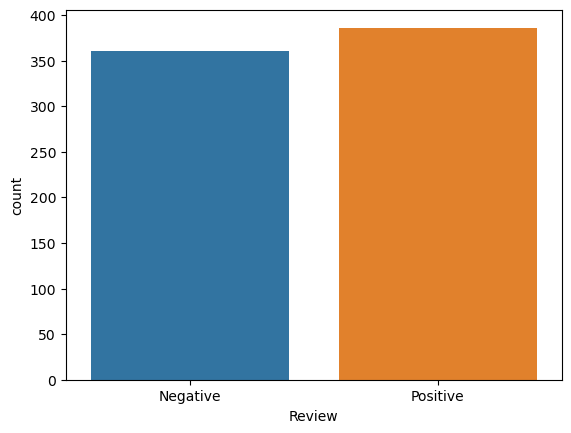

In [11]:
#visualization of Review
sns.countplot(x='Review',data=df)

In [12]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [13]:
lemmatizer=WordNetLemmatizer()

In [14]:
data = []
for i in range(0, len(df)):
    words = re.sub('[^a-zA-Z]', ' ', df['customer_feedback'][i])
    words = words.lower()
    words = words.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    words = ' '.join(words)
    data.append(words)

In [15]:
data

['sure lost flat character audience nearly half walked',
 'attempting artiness black white clever camera angle movie disappointed became even ridiculous acting poor plot line almost non existent',
 'little music anything speak',
 'best scene movie gerardo trying find song keep running head',
 'rest movie lack art charm meaning emptiness work guess empty',
 'wasted two hour',
 'saw movie today thought good effort good message kid',
 'bit predictable',
 'loved casting jimmy buffet science teacher',
 'baby owl adorable',
 'movie showed lot florida best made look appealing',
 'song best muppets hilarious',
 'cool',
 'right case movie delivers everything almost right face',
 'average acting main person low budget clearly see',
 'review long overdue since consider tale two sister single greatest film ever made',
 'put gem movie term screenplay cinematography acting post production editing directing aspect film making',
 'practically perfect true masterpiece sea faux masterpiece',
 'structure

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))

In [17]:
X = cv.fit_transform(data).toarray()

In [18]:
X.shape

(747, 8921)

In [19]:
Y=df['Review'].values
Y.shape

(747,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [21]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, Y_train)

SVC()

In [22]:
SVC_predictions = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
accuracy = accuracy_score(Y_test, SVC_predictions)
accuracy

0.7111111111111111

In [25]:
cm = confusion_matrix(Y_test, SVC_predictions)
cm

array([[78, 29],
       [36, 82]], dtype=int64)

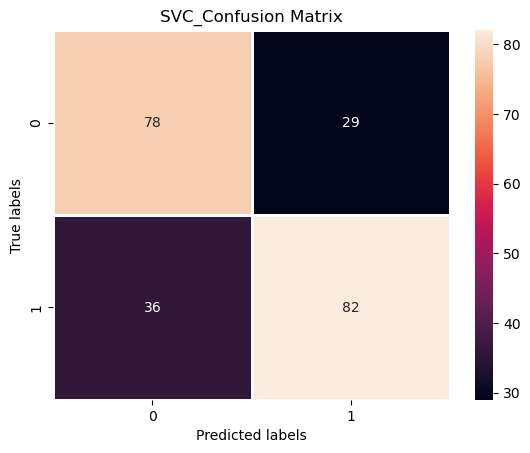

In [26]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVC_Confusion Matrix')
plt.show()


In [27]:
print(classification_report(Y_test, SVC_predictions))

              precision    recall  f1-score   support

    Negative       0.68      0.73      0.71       107
    Positive       0.74      0.69      0.72       118

    accuracy                           0.71       225
   macro avg       0.71      0.71      0.71       225
weighted avg       0.71      0.71      0.71       225



In [28]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, Y_train)
NB_predictions = naive.predict(X_test)

In [29]:
NB_accuracy = accuracy_score(Y_test, NB_predictions)
NB_accuracy

0.7111111111111111

In [30]:
cm = confusion_matrix(Y_test, NB_predictions)
cm

array([[74, 33],
       [32, 86]], dtype=int64)

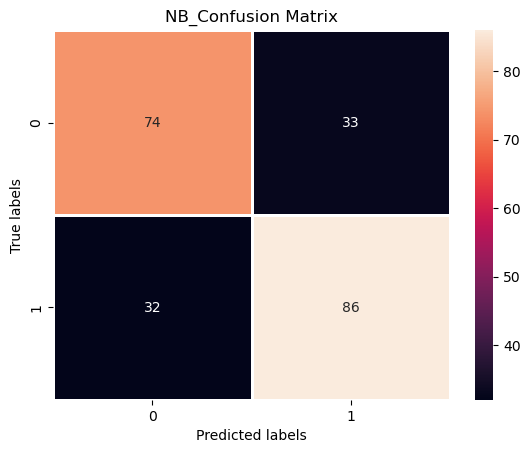

In [31]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('NB_Confusion Matrix')
plt.show()

In [32]:
print(classification_report(Y_test, NB_predictions))

              precision    recall  f1-score   support

    Negative       0.70      0.69      0.69       107
    Positive       0.72      0.73      0.73       118

    accuracy                           0.71       225
   macro avg       0.71      0.71      0.71       225
weighted avg       0.71      0.71      0.71       225



In [33]:
import joblib
joblib.dump(naive,"Naive_Bayes_Model")

['Naive_Bayes_Model']

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [35]:
#By using the we can predict the predictions easily 

In [36]:
X = df['customer_feedback']
y = df['Review']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
SVC_pipe_line = Pipeline([('count_vectorizer', CountVectorizer()),('SVC_model', SVC(gamma='auto'))])
SVC_pipe_line.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('SVC_model', SVC(gamma='auto'))])

In [39]:
SVC_PP_predictions = SVC_pipe_line.predict(X_test)

In [40]:
accuracy_score(y_test, SVC_PP_predictions)

0.5080213903743316

In [41]:
Response = Pipeline([('count_vectorizer', CountVectorizer()),('naive_model', MultinomialNB())])
Response.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('naive_model', MultinomialNB())])

In [42]:
Plnaive_predictions = Response.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, Plnaive_predictions)
cm

array([[77, 15],
       [40, 55]], dtype=int64)

In [44]:
accuracy_score(y_test, Plnaive_predictions)

0.7058823529411765

In [45]:
Response.predict(['The product is worst'])

array(['Negative'], dtype='<U8')